# Project 1: Processing health and activity data [40 marks]

---

Make sure you read the instructions in `README.md` before starting! In particular, make sure your code is well-commented, with sensible structure, and easy to read throughout your notebook.

---

The MMASH dataset [1, 2] is is a dataset of health- and activity-related measurements taken on 22 different people, over a continuous period of 24 hours, using wearable devices.

In this project, we have provided you with some of this data for **10** of those individuals. In the `dataset` folder, you will find:

- a file `subject_info.txt` which summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants,
- 10 folders named `subject_X`, which each contain two files:
    - `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period,
    - `actigraph.txt` contains heart rate and other activity data measured with another device, over the same 24-hour period.

The tasks below will guide you through using your Python skills to process some of this data. Note that the data was reformatted slightly for the purpose of the assignment (to make your life a bit easier!), but the values are all the original ones from the real dataset.

### Getting stuck

Tasks 3 to 8 follow directly from each other. There is a `testing` folder provided for you with `.npy` files and a supplementary `actigraph.txt` dataset. The `.npy` files are NumPy arrays, which you can load directly using `np.load()`, containing an example of what the data should look like after each task. You will be able to use this example data to keep working on the later tasks, even if you get stuck on an earlier task. Look out for the 💾 instructions under each task.

These were produced using the data for another person which is not part of the 10 you have in your dataset.


### References

[1] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). Multilevel Monitoring of Activity and Sleep in Healthy People (version 1.0.0). PhysioNet. https://doi.org/10.13026/cerq-fc86

[2] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). A Public Dataset of 24-h Multi-Levels Psycho-Physiological Responses in Young Healthy Adults. Data, 5(4), 91. https://doi.org/10.3390/data5040091.

---
## Task 1: Reading the subject information

The file `subject_info.txt` in your `dataset` folder summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants.

---
🚩 ***Task 1:*** Write a function `read_subject_info()` which reads in the information in `subject_info.txt`, and returns two outputs:

- a list `headers` containing the four column headers as strings, read from the first line in the file;
- a NumPy array `info` containing the numerical information for each person (i.e. it should have 10 rows and 4 columns).

**Important:** the height of each subject should be given in **metres** in your `info` array.

**[3 marks]**

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:

def read_subject_info():
    '''This function is designed to read subject_info taking the txt file as your input 
    and create an output of the text file as an array in python for future use in python.
    
    You have to specify the inputs and outputs'''
    
    #create the headers
    with open("dataset/subject_info.txt") as data:
        headers = data.readline()
        headers = [headers.strip().split(',')]  # these ensure that we calculate each column correctly
        print(headers)
        
    #Create the numpy array of the rest of the data with Height in metres instead of cm.    
    info = np.loadtxt("dataset/subject_info.txt", delimiter=',', skiprows = 1, dtype = float)

    info[:,2] = info[:,2] / 100 #This transforms the Height into metres

    return info

read_subject_info()

[['Subject', 'Weight', 'Height', 'Age']]


array([[  1.  ,  95.  ,   1.83,  27.  ],
       [  2.  ,  80.  ,   1.96,  25.  ],
       [  3.  ,  62.  ,   1.78,  27.  ],
       [  4.  ,  65.  ,   1.83,  25.  ],
       [  5.  ,  74.  ,   1.84,  40.  ],
       [  6.  ,  70.  ,   1.75,  20.  ],
       [  7.  , 115.  ,   1.86,  27.  ],
       [  8.  ,  80.  ,   1.8 ,  24.  ],
       [  9.  ,  70.  ,   1.75,  29.  ],
       [ 10.  ,  92.  ,   2.05,  32.  ]])

---
## Task 2: Charting the Body Mass Index (BMI) for all participants

The Body Mass Index (BMI) can be used to indicate whether someone is at a healthy body weight. [The NHS website](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/) describes it as follows:

> The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy.
>
> The BMI calculation divides an adult's weight in kilograms by their height in metres, squared. For example, a BMI of $25$ means $25 \text{kg/m}^2$.
>
> For most adults, an ideal BMI is in the $18.5$ to $24.9$ range.

This means that the BMI is calculated as follows:

$$
\text{BMI} = \frac{\text{weight}}{\text{height}^2}.
$$

---
🚩 ***Task 2:*** Write a function `bmi_chart(info)` which takes as input the `info` array returned by `read_subject_info()`, produces a visualisation showing all subjects' heights and weights on a graph, and clearly indicates whether they are within the "healthy weight" range as described above (i.e. their BMI is in the $18.5$ to $24.9$ range).

Your function should not return anything, but calling it with `bmi_chart(info)` must be sufficient to display the visualisation.

You should choose carefully how to lay out your plot so that it is easy to interpret and understand.

**[4 marks]**

[['Subject', 'Weight', 'Height', 'Age']]
[ 95.  80.  62.  65.  74.  70. 115.  80.  70.  92.]
[1.83 1.96 1.78 1.83 1.84 1.75 1.86 1.8  1.75 2.05]


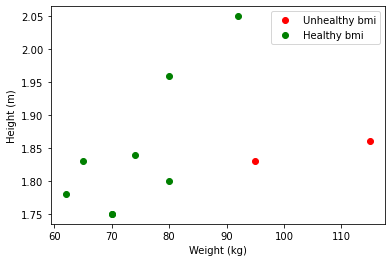

In [23]:
info = read_subject_info()

def bmi_chart(info):
    '''This function takes as inputs the Weight and Height columns from read_subject_info and displays 
    them in a scatter plot. Healthy BMIs being presented in green, unhealthy BMIs being presented in red'''

    #Taking the inputs
    weight = info[:,1] #all elements of the second column are collected and stored in the array Weight
    print(weight)
    height = info[:,2] #all elements of the third column are collected and stored in the array Height
    print(height)
    
    #BMI results are stored in an array bmi
    bmi = weight/height**2

    
    #Creating empty lists so that healthy values can be plotted as a group.
    healthy_weight = []
    healthy_height = []
    
    #Creating empty lists so that unhealthy values can be plotted as a group separate to the healthy values.
    unhealthy_weight = []
    unhealthy_height = []
    
    
    #Create the healthy and unhealthy weights and heights
    for element in range(len(bmi)): #Range of all variables are the same. so just need len of one.
        if 18.5 <= bmi[element] <= 24.9: #Heathy BMIs specified in the question.
            healthy_weight.append(weight[element])
            healthy_height.append(height[element])
            
        else:
            unhealthy_weight.append(weight[element])
            unhealthy_height.append(height[element])

            
    #Creating two separate plots on the same chart. healthy in green, unhealthy in red.
    plt.plot(unhealthy_weight, unhealthy_height, 'ro', label = 'Unhealthy bmi')
    plt.plot(healthy_weight, healthy_height, 'go', label = 'Healthy bmi')
    plt.xlabel('Weight (kg)')
    plt.ylabel('Height (m)')
    plt.legend() #Creating the legend in the top right corner.
    plt.show() #displays the chart
    
#Call the function.    
bmi_chart(info)



---
## Task 3: Instantaneous heart rate data

For each subject, the file `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period. Specifically, the two columns record the time at which each heartbeat was detected, and the interval (in seconds) between the current heartbeat and the previous one.

### Handling timestamp data

For the next tasks, you will use NumPy's `datetime64[s]` and `timedelta64[s]` object types, respectively used to represent times (as if read on a clock) and time intervals. You should [consult the relevant documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetimes-and-timedeltas).

Here are a few illustrative examples:

['2022-10-20T00:00:00' '2022-10-23T00:00:00' '2022-10-28T00:00:00']
1814400 seconds
<class 'numpy.timedelta64'>
1814400.0
<class 'numpy.timedelta64'>
21.0


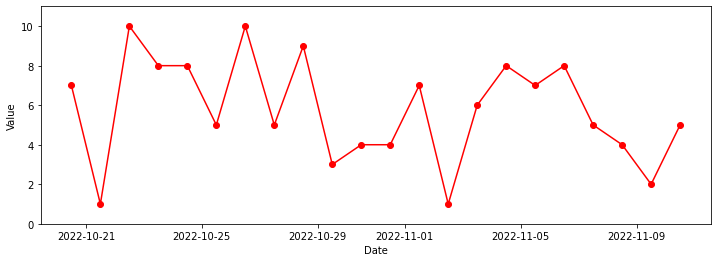

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Create two datetime objects and a vector of dates
start_time = np.datetime64('2022-10-20 12:00:00')
end_time = np.datetime64('2022-11-10 12:00:00')
time_vector = np.array(['2022-10-20', '2022-10-23', '2022-10-28'], dtype='datetime64[s]')
print(time_vector)

# Get time interval between the two times
time_elapsed = end_time - start_time
print(time_elapsed)
print(type(time_elapsed))

# Divide by the duration of 1 second to get number of seconds (as a number object)
seconds_elapsed = time_elapsed / np.timedelta64(1, 's')
print(seconds_elapsed)
print(type(time_elapsed))

# Divide by the duration of 1 day to get number of days
days_elapsed = time_elapsed / np.timedelta64(1, 'D')
print(days_elapsed)

# Create a range of datetimes spaced by 1 day
step = np.timedelta64(1, 'D')
days = np.arange(start_time, end_time + step, step)

# Plot something using days as the x-axis
fig, ax = plt.subplots(figsize=(12, 4))
value = np.random.randint(1, 11, size=len(days))
ax.plot(days, value, 'ro-')
ax.set(ylim=[0, 11], xlabel='Date', ylabel='Value')
plt.show()

---
🚩 ***Task 3a:*** Write a function `read_heartbeat_data(subject)` which takes as input an integer `subject` between 1 and 10, reads the data in `heartbeats.txt` for the given `subject`, and returns it as two NumPy vectors:

- `times`, containing the recorded times of each heartbeat (as `datetime64[s]` objects),
- `intervals`, containing the recorded intervals between heartbeats (in seconds, as `float` numbers).
**[3 marks]**

In [25]:
def read_heartbeat_data(subject):
    ''' Take from dataset the information and return two numpy vectors, when the heartbeats happened and 
    the interval time between each heartbeat.
    
    This needs to be possible for all 10 subjects. 
    
    each subject is stored in a different folder within datasets. each with their own individual heartbeat data.'''

    
    #Pulling the heartbeats information from the subject folders. Skip first row to ensure we only get the data we want.
    info = np.loadtxt(f'dataset/subject_{subject}/heartbeats.txt', delimiter=',', dtype = str, skiprows = 1)

    #Creating the numpy vector for time and intervals.
    time = np.array(info[:, 1], dtype = 'datetime64[s]') #Get the time array Specify dtype as instructed
    intervals = np.array(info[:, 2], dtype = 'float') #Get the intervals array
    
    
    times_raw = time 
    return times_raw, intervals

print(read_heartbeat_data(1))

 
#this defines them globally rather than just locally within the function.
times_raw, intervals = read_heartbeat_data(subject = 1) 





(array(['2022-07-22T10:03:18', '2022-07-22T10:03:19',
       '2022-07-22T10:03:19', ..., '2022-07-23T09:45:07',
       '2022-07-23T09:45:07', '2022-07-23T09:45:07'],
      dtype='datetime64[s]'), array([6.512, 0.453, 0.374, ..., 0.342, 0.327, 0.269]))


---
🚩 ***Task 3b:*** Write a function `hr_from_intervals(intervals)` which takes as input a NumPy vector containing heartbeat interval data (such as that returned by `read_heartbeat_data()`), and returns a NumPy vector of the same length, containing the instantaneous heart rates, in **beats per minute (BPM)**, calculated from the intervals between heartbeats. You should return the heart rates as floating-point numbers.

For instance, an interval of 1 second between heartbeats should correspond to a heart rate of 60 BPM.

**[2 marks]**

In [26]:
def hr_from_intervals(intervals):
    '''use the heartbeat interval data from 3a. use this to calculate the BPM
    
    We want to create a BPM for every element as opposed to calculating BPM for every minute.
    
    I want to return a separate list of instantaneous heart rate'''
    
    #Create the array with the same number of elements for BPM as there were for intervals
    bpm = np.zeros(len(intervals), dtype = 'float') #Q specifies float
    
    #append this new array with the BPM values for each element.
    for element in range(len(intervals)):
        bpm[element] += round(60/intervals[element], 2) #append each element with a float rounded to 2 dp

    
    return bpm
    
            
hr_raw = hr_from_intervals(intervals)           
          
hr_from_intervals(intervals)

array([  9.21, 132.45, 160.43, ..., 175.44, 183.49, 223.05])

---
## Task 4: Data cleaning

There are gaps and measurement errors in the heartbeat data provided by the device. These errors will likely appear as outliers in the data, which we will now try to remove.

One possible method is to remove data points which correspond to values above and below certain **percentiles** of the data. Removing the data below the $p$th percentile means removing the $p\%$ lowest values in the dataset. (Note that, for instance, the 50th percentile is the median.)

---
🚩 ***Task 4a:*** Write a function `clean_data(times_raw, hr_raw, prc_low, prc_high)` which takes 4 inputs:

- `times_raw` is the NumPy array of timestamps returned by `read_heartbeat_data()`,
- `hr_raw` is the NumPy array of computed heart rate values returned by `hr_from_intervals()`,
- `prc_low` and `prc_high` are two numbers such that $0\leq$ `prc_low` $<$ `prc_high` $\leq 100$.

Your function should return two NumPy arrays of the same length, `times` and `hr`, which are the original arrays `times_raw` and `hr_raw` where all the measurements (heart rate and associated time stamp) below the `prc_low`th percentile and above the `prc_high`th percentile of the heart rate data have been removed.

You may wish to make use of NumPy functionality to calculate percentiles.

**[4 marks]**

In [27]:
hr_raw = hr_from_intervals(intervals)
times_raw, intervals = read_heartbeat_data(subject = 1) 


def clean_data(times_raw, hr_raw, prc_low, prc_high):
    '''
    Inputs: times_raw, hr_raw, prc_low, prc_high
    
    returns: times and hr which are the cleaned data with the p% lowest and highest values are not included
    '''
    #Ensure that prc_low and prc_high are in their correct ranges
    if prc_low > prc_high or prc_low < 0 or prc_high > 100:
        raise ValueError('prc_low and prc_high both need to be between 0 and 100 with prc_low < prc_high')

    #finds the value of the prc_low element. i.e. prc_low = 1, then finds value of hr_raw at the 1% mark 
    #in the list of elements sorted in size order
    percent_low = np.percentile(hr_raw, prc_low)
    percent_high = np.percentile(hr_raw, prc_high)
    
    #Create 2 new empty arrays to put the clean data in.
    times = []
    hr = []
    
    #Add the new elements to the new clean arrays
    for element in range(len(hr_raw)):
        if hr_raw[element] > percent_low and hr_raw[element] < percent_high: #only adds the elements within the specified rannge.
            times.append(times_raw[element])
            hr.append(hr_raw[element])

    #ensure they are in the proper format
    times = np.array(times)
    hr = np.array(hr)
    return times, hr

clean_data(times_raw, hr_raw, 1, 99)
times, hr = clean_data(times_raw, hr_raw, 1, 99)



---
🚩 ***Task 4b:*** Write a function `evaluate_cleaning(subject)`, which takes as input an integer `subject` between 1 and 10 indicating the subject number, and plots the following two histograms for that subject:

- a histogram of the raw heart rate data,
- a histogram of the heart rate data after cleaning with `clean_data()`, where the bottom 1% and the top 1% of the values have been removed.

Your histograms should use a logarithmic scale on the y-axis, and be clearly labelled. You should consider carefully how to lay out the histogram to best present the information.

Your function `evaluate_cleaning()` should call the functions `read_heartbeat_data()`, `hr_from_intervals()`, and `clean_data()` you wrote above, in order to obtain the raw and cleaned heart rate data for a given `subject`.

Then, use your function to display the histograms of the raw and cleaned data for Subject 3. Given that heart rates in adults can typically range from about 40 to 160 beats per minute, and given your histograms, explain why this is a suitable method to remove likely measurement errors in the heart rate data.

**[3 marks]**

---

💾 *If you are stuck on Task 3 or on the task above, you can load the data provided in the `testing` folder to produce your histograms, by running the following commands:*

```python
times_raw = np.load('testing/times_raw.npy')
hr_raw = np.load('testing/hr_raw.npy')
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

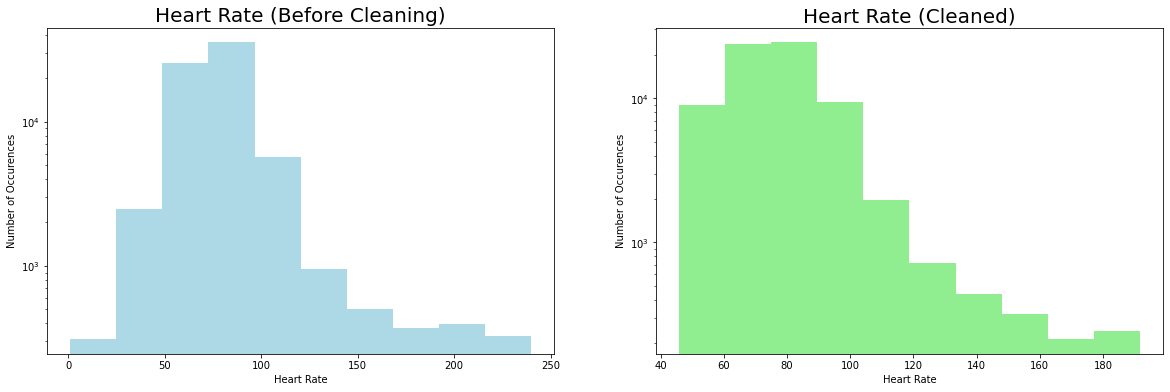

In [28]:
def evaluate_cleaning(subject):
    '''
    Inputs: hr_raw and hr
    return: the histograms of hr_raw and hr'''
    
    #Ensuring input for subject is valid. Has to be between 1 and 10.
    if subject < 1 or subject > 10:
        raise ValueError('subject must be between 1 and 10')
        
    else:
        #Specifying these to ensure that they are defined.
        times_raw, intervals = read_heartbeat_data(subject)
        hr_raw = hr_from_intervals(intervals)
        hr = clean_data(times_raw, hr_raw, 1, 99)[1]
        
        #Ensuring that the histograms are shown together.
        fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
        
        
        #Plotting histogram for the Heart Rate before cleaning
        ax1.hist(hr_raw, log = True, color = 'lightblue') #Create hist
        ax1.set_title('Heart Rate (Before Cleaning)', fontsize = 20) #Create title
        ax1.set_xlabel('Heart Rate') #Set x axis title
        ax1.set_ylabel('Number of Occurences') #set y axis title
        
        
        #Plotting the histogram for clean heart rate data and using the log scale for y-axis
        ax2.hist(hr, log = True, color = 'lightgreen')
        ax2.set_title('Heart Rate (Cleaned)', fontsize = 20)
        ax2.set_xlabel('Heart Rate')
        ax2.set_ylabel('Number of Occurences')
        
        plt.show()
    

evaluate_cleaning(subject = 1)

*Use this Markdown cell to write your explanation for Task 4.*

get rid of any outlying data which is specified by whichever values you use for prc_low and prc_high. Create a list excluding those outliers.

then create two histograms, one before remoing the outliers, and one after removing the outliers.

---
## Task 5: Interpolating the data

Although the device detecting heartbeats was able to measure intervals between beats with millisecond precision, the recorded timestamps could only record the second at which a heartbeat occurred. This means that there are not only time gaps in the data (due to the device missing heartbeats), but also several heartbeats usually recorded in the same second.

For example, this is an excerpt from Subject 7's data, showing a 9-second time gap between `09:19:57` and `09:20:06`, as well as 3 different heartbeats detected at `09:20:06`:

```
59,2022-07-21 09:19:56,1.033
60,2022-07-21 09:19:57,0.942
61,2022-07-21 09:20:06,0.307
62,2022-07-21 09:20:06,0.439
63,2022-07-21 09:20:06,0.297
64,2022-07-21 09:20:07,0.427
```

The goal of this next task is to **interpolate** the recorded data, in order to produce a new dataset containing values of the heart rate at regular time intervals. We will use **linear interpolation**, with the help of SciPy's `interp1d()` function (from the `interpolate` module) which we saw in Week 5.

---
🚩 ***Task 5a:*** The `interp1d()` function from SciPy can only be used with numeric data, and not timestamps. Two functions are provided for you below.

- Explain, in your own words, what both functions do and how.
- Write a few lines of test code which clearly demonstrate how the functions work.

**[2 marks]**

In [29]:
def datetime_to_seconds(times):
    
    return (times - times[0]) / np.timedelta64(1, 's')

#Create a variable so as to explain datetime_to_seconds
explain = np.array(['2022-07-21', '2022-07-22'], dtype = 'datetime64' )
print(datetime_to_seconds(explain))



def seconds_to_datetime(seconds_elapsed, start_time):
    
    return seconds_elapsed * np.timedelta64(1, 's') + start_time

#Create variable so as to explain seconds_to_datetime
explain_2 = np.array(['2022-07-21'], dtype = 'datetime64')
print(seconds_to_datetime(np.array([0, 4000000]), explain_2))

[    0. 86400.]
['2022-07-21T00:00:00' '2022-09-05T07:06:40']


*Use this Markdown cell to explain how the functions `datetime_to_seconds()` and `seconds_to_datetime()` work.*

in datetime_to_seconds(times), it calculates every single element and takes the first element from each of these. leave you with just a number of how many seconds have passed from the initial time to the time stamp of the current element you are observing in the array. So an element a full day away would show 86400 seconds have elapsed as a number. Dividing by np.timedelta64(1, 's') ensures that the value you get out is a number and not a time stamp.

in seconds_to_datetime, it calculates how many seconds have elapsed since the initial start time and whichever end time you choose in seconds. for instance between the start of the 12th and 7:06:40 on the 28th, there are 4,000,000 seconds.

this result is time stamped which allows it to be more useful in scenarios that require time stamps. otherwise datetime_to_seconds is fine for finding the interval in seconds

---
🚩 ***Task 5b:*** Write a function `generate_interpolated_hr(times, hr, time_delta)` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object representing a time interval in seconds,

and returns two new NumPy vectors, `times_interp` and `hr_interp`, such that:

- `times_interp` contains regularly spaced `datetime64[s]` timestamps, starting at `times[0]`, ending on or less than `time_delta` seconds before `times[-1]`, and with an interval of `time_delta` between consecutive times.
- `hr_interp` contains the heart rate data obtained using **linear interpolation** and evaluated at each time in `times_interp`, for example with the help of the `interp1d()` function from `scipy.interpolate`.

For example, if `times` starts at `10:20:00` and ends at `10:20:09` with a `time_delta` of two seconds, then your `times_interp` vector should contain `10:20:00`, `10:20:02`, `10:20:04`, `10:20:06`, `10:20:08`, and `hr_interp` should consist of the corresponding interpolated heart rate values at each of those times.

**[4 marks]**

In [30]:
#Not hand in worthy yet
from scipy.interpolate import interp1d

def generate_interpolated_hr(times, hr, time_delta):
    '''
    Inputs: times, hr and time_delta
    
    Returns: times_interp, hr_interp. returns the interpolated data of these two arrays.'''
    
    time_seconds = datetime_to_seconds(times) #Changing the time stamps to seconds.
    
    #Creating the number of time intervals between the first and last time stamps.
    time_intervals = np.arange(0, time_seconds[-1], time_delta/np.timedelta64(1, 's')) #
    
    inter = interp1d(time_seconds, hr) # interpolating hr with time elapsed
    
    times_interp = seconds_to_datetime(time_intervals, times[0]) # converting the seconds back to time stamps using the second function from 5a.
    
    hr_interp = inter(time_intervals) #interpolating heart rates
    
    return times_interp, hr_interp




#All these are written
# times_raw, intervals = read_heartbeat_data(subject = 1)
# hr_raw = hr_from_intervals(intervals)
# times, hr = clean_data(times_raw, hr_raw, 1, 99)
# time_delta = np.timedelta64(5, 's')     #Why 5?????? 5 asked for in 5c
# times_interp, hr_interp = generate_interpolated_hr(times, hr, time_delta)
    
    
    
    

---
🚩 ***Task 5c:*** Check your `generate_interpolated_hr()` function by generating interpolated heart rate data for Subject 1 for just the first 100 measurements (after cleaning). You should generate interpolated data with a time interval of 5 seconds. Plot the data points, as well as your interpolated data, and discuss in the Markdown cell below whether your plot is what you expected, and why.

**[2 marks]**

---
💾 *If you are stuck on Task 4, you can use the cleaned data provided in the `testing` folder to check your code, by running the following commands:*

```python
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

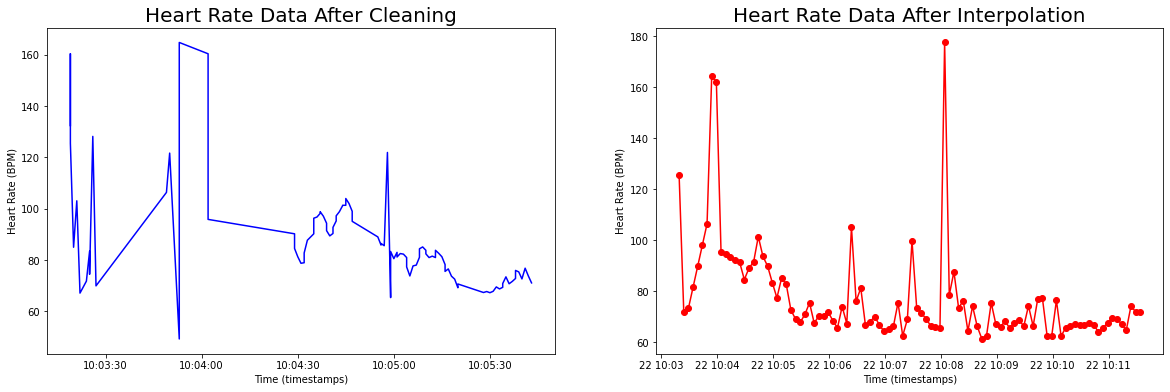

In [31]:
#Not ready for submission
#change font sizes. change names.
#Need to explain in the markdown cell.

#Ensure that these are specified in the cell
times_raw, intervals = read_heartbeat_data(subject = 1)
hr_raw = hr_from_intervals(intervals)
times, hr = clean_data(times_raw, hr_raw, 1, 99)
time_delta = np.timedelta64(5, 's')     #5 is specified by the Q
times_interp, hr_interp = generate_interpolated_hr(times, hr, time_delta)


fig, (ax3, ax4) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))

#plotting the cleaned heart rates (using time stamps)
ax3.plot(times[:100], hr[:100], 'b-') #can easily change the colour. #ro(delete)

ax3.set_title('Heart Rate Data After Cleaning', fontsize = 20) #Graph title

ax3.set_xlabel('Time (timestamps)', fontsize = 10) #X axis label

ax3.set_ylabel('Heart Rate (BPM)', fontsize = 10) #Y axis label

#Plots Heart Rate Data after Interpolation
ax4.plot(times_interp[:100], hr_interp[:100], 'ro-')

ax4.set_title('Heart Rate Data After Interpolation', fontsize = 20)

ax4.set_xlabel('Time (timestamps)', fontsize = 10)

ax4.set_ylabel('Heart Rate (BPM)', fontsize = 10)

plt.show()

*Use this Markdown cell for discussing your interpolation results.*
in the blue graph there were time periods that contained multiple heart beats. before interpolation you receive multiple readings per time stamp. After interpolation we have one reading per time stamp.

Therefore we needed to interpolate the data to ensure that after cleaning the data we got one reading per time stamp rather than multiple.

---
## Task 6: Smoothing the data with a rolling average

A rolling average is simply an average of the heart rate data, calculated over a given window of time. For example:

- The 20-second rolling average of the heart rate at a time `10:20:00` is the average heart rate over the 20 seconds leading up to that time, i.e. the average of all the heart rates between `10:19:41` and `10:20:00` (inclusive). If we have measurements of the heart rate every 5 seconds, then this would be the average of the heart rates measured at `10:19:45`, `10:19:50`, `10:19:55`, and `10:20:00`.
- We can similarly calculate the 20-second rolling average at the next measurement time, `10:20:05`, as the average heart rate over the 20-second period from `10:19:46` to `10:20:05` (inclusive).

The rolling average essentially smoothes out the sudden jumps in the measured (or interpolated) heart rate data, allowing us to see the longer-term variations more clearly.

---
🚩 ***Task 6:*** Write a function `rolling_average()` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object `time_delta` representing a time interval in seconds,
- a `timedelta64[s]` object `window`, representing the window duration in seconds (with `window` assumed to be an integer multiple of `time_delta`),

and returns a NumPy vector `hr_rolling` containing values for the rolling average of the heart rate over time, with the given window size.

Your `rolling_average()` function should call `generate_interpolated_hr()` to generate regularly-spaced heart rate data with a time interval `time_delta`, before computing and returning the averaged heart rate data.

Note that `hr_rolling` will be shorter than the length of your interpolated heart rate data, because you can only start computing rolling averages after one window of time has elapsed. (For instance, if your data starts at `10:20:00`, with a 30-second window, the first value of the rolling average you can obtain is at `10:20:29`.)

**[4 marks]**

In [32]:
#Not ready for submission.

def rolling_average(times, hr, time_delta, window):
    '''
    Inputs: times, hr, time_delta, window
    
    Returns: hr_rolling, the rolling average of heart rates 
    
    '''
    #Ensuring this function has times_interp and hr_interp
    times_interp, hr_interp = generate_interpolated_hr(times, hr, time_delta)
    
    #Creating the time in terms of their time window
    rolling_times = generate_interpolated_hr(times_interp, hr_interp, window)[0]
    
    #Creating Empty array
    hr_rolling = np.array([np.nan], dtype = float)
    
    #Going through the times_rolling array in order to create hr_rolling
    for element in range(0, len(rolling_times) - 1):
        hr_window = hr_interp[(times_interp >= rolling_times[element]) & (times_interp < rolling_times[element + 1])] #hr in the window given
        hr_rolling = np.append(hr_rolling, np.mean(hr_window)) #Ensuring hr_rolling contains av hr for time intervals
        
    return hr_rolling
rolling_average(times, hr, np.timedelta64(3, 's'), np.timedelta64(30, 's')) #Window = 30
    

array([         nan,  87.25572727, 113.78540741, ..., 108.5245    ,
        92.819625  ,  83.723375  ])

---
## Task 7: Putting it all together

You should now have a series of functions which allow you to:

- read data on measured heartbeart-to-heartbeat intervals for a given subject,
- transform this data into heart rate measurements and clean out the outliers,
- interpolate the data to generate measurements at regular time intervals,
- compute a rolling average of the heart rate data over time, to smooth out the data.

For each subject, there is another file `actigraph.txt`, containing activity data recorded by a separate device. In particular, this data provides another independent measurement of the subjects' heart rate. We can use this to check our work.

---
🚩 ***Task 7:*** Write a function `display_heart_rate(subject)` which takes as input an integer `subject` between 1 and 10, and produces one single graph, containing two plots on the same set of axes:

- a plot of the heart rate data found in `actigraph.txt` over time,
- a plot of the smoothed heart rate data computed by you from the data in `heartbeats.txt`, using interpolated measurements of the heart rate every 3 seconds, and a 30-second window size for the averaging.

Your plot should show good agreement between the two sets of data. Instead of showing the full 24 hours of data, you should choose a period of time over which to plot the heart rate (say, approximately 1 hour), in order to better visualise the results.

Show an example by using your function to display the results for 3 subjects of your choice.

**[4 marks]**

---
💾 *If you are stuck on Task 5 or 6, you can use the actigraph heart rate data provided in the `testing` folder in `actigraph.txt`, and compare this to the smoothed heart rate data provided in the `testing` folder, which you can load by running the following command:*

```python
hr_rolling = np.load('testing/hr_rolling.npy')
```

In [33]:
def read_actigraph_data(subject):
    '''This function is designed to read subject_info taking the txt file as your input 
    and create an output of the text file as an array in python for future use in python.
    
    You have to specify the inputs and outputs'''
    

        
    #Create the numpy array of the rest of the data with Height in metres instead of cm.    
    info1 = np.loadtxt(f'dataset/subject_{subject}/actigraph.txt', delimiter=',', skiprows = 1, usecols = (1, 2), dtype = 'str')

    acti_time = np.array(info1[:, 0], dtype = 'datetime64')
    acti_heart = np.array(info1[:, 1], dtype = float)
    
#     print(acti_time)
#     print(acti_heart)
#     print(type(acti_time))

    return acti_time, acti_heart

read_actigraph_data(1)


(array(['2022-07-22T10:03:21', '2022-07-22T10:03:22',
        '2022-07-22T10:03:23', ..., '2022-07-23T09:45:11',
        '2022-07-23T09:45:12', '2022-07-23T09:45:13'],
       dtype='datetime64[s]'),
 array([136., 136.,  94., ...,  86.,  86.,  86.]))

In [34]:
def display_heart_rate(subject):
    '''
    Inputs: subject
    
    Returns: graphs using all the data manipulation techniques we learnt from both heartbeats.txt and actigraph.txt
    '''
        #Ensuring input for subject is valid. Has to be between 1 and 10.
    if subject < 1 or subject > 10:
        raise ValueError('1 <= subject <= 10 ')
    
    else:
        #Specifying these to ensure that they are defined. 
        times_raw, intervals = read_heartbeat_data(subject)
        hr_raw = hr_from_intervals(intervals)
        times, hr = clean_data(times_raw, hr_raw, 1, 99) #prc_low = 1, prc_high = 99
        time_delta = np.timedelta64(3, 's')
        times_interp, hr_interp = generate_interpolated_hr(times, hr, time_delta)
        window = np.timedelta64(30, 's') #Window = 30 seconds
        hr_rolling = rolling_average(times, hr, time_delta, window)
        rolling_times = generate_interpolated_hr(times_interp, hr_interp, window)[0]
        
        
        #Collecting Heart Rates from actigraph.txt using the function from Q1
        times_acti, BPM_acti = read_actigraph_data(subject)[0], read_actigraph_data(subject)[1]
        
        
        #Time stamp which tells the code its the end of the hour
        end_time_acti = times_acti[0] + np.timedelta64(1, 'h')
        end_time_rolling = rolling_times[0] + np.timedelta64(1, 'h')
        
        
        acti_time_fixed = times_acti[(times_acti <= end_time_acti)]
        acti_bpm_fixed = BPM_acti[(times_acti <= end_time_acti)]
        
        rolling_time_fixed = rolling_times[(rolling_times <= end_time_rolling)]
        hr_rolling_fixed = hr_rolling[(rolling_times <= end_time_rolling)]
        
        
        #Plot line charts for both and compare
        fig, ax5 = plt.subplots(figsize = (25, 15))
        
        ax5.plot(rolling_time_fixed, hr_rolling_fixed, 'r-', label = 'Rolling Av of Heart Rates') #heart rate for 
        ax5.plot(acti_time_fixed, acti_bpm_fixed, 'g-', label = 'Actigraph Heart Rate') #heart rate for actigraph.txt over time
        ax5.set_title(f'Comparison of Heart Rates between heartbeat.txt and actigraph.txt for subject {subject}', fontsize = 15) #created title
        ax5.set_xlabel('Timestamp', fontsize = 12) #x axis title
        ax5.set_ylabel('Heart Rate', fontsize = 12) #y axis title
        plt.legend() #Shows the legend
        plt.show() #shows the graphs

    
    
    
    

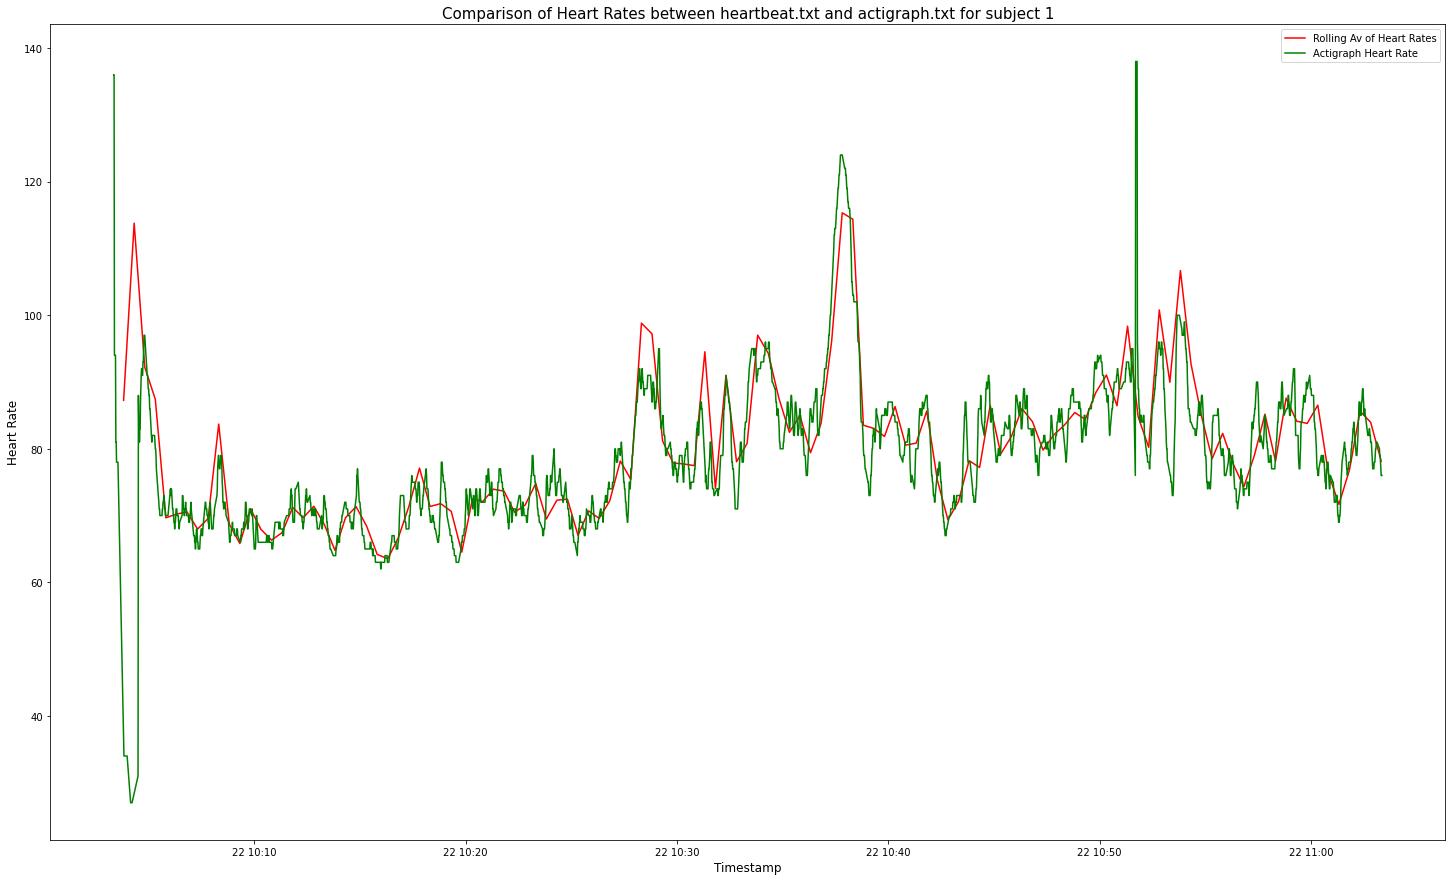

In [35]:
display_heart_rate(1)

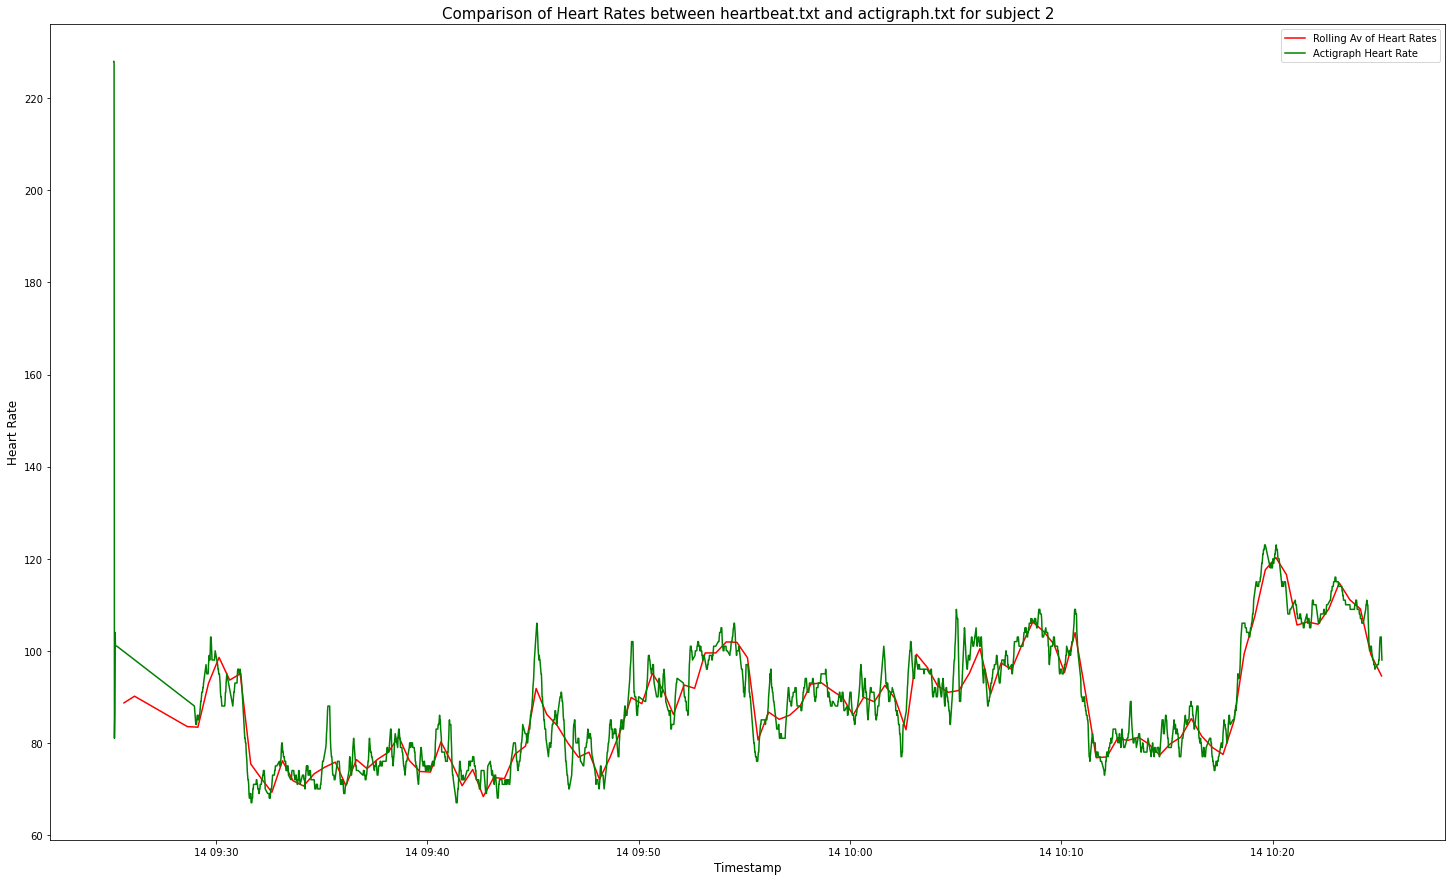

In [36]:
display_heart_rate(2)

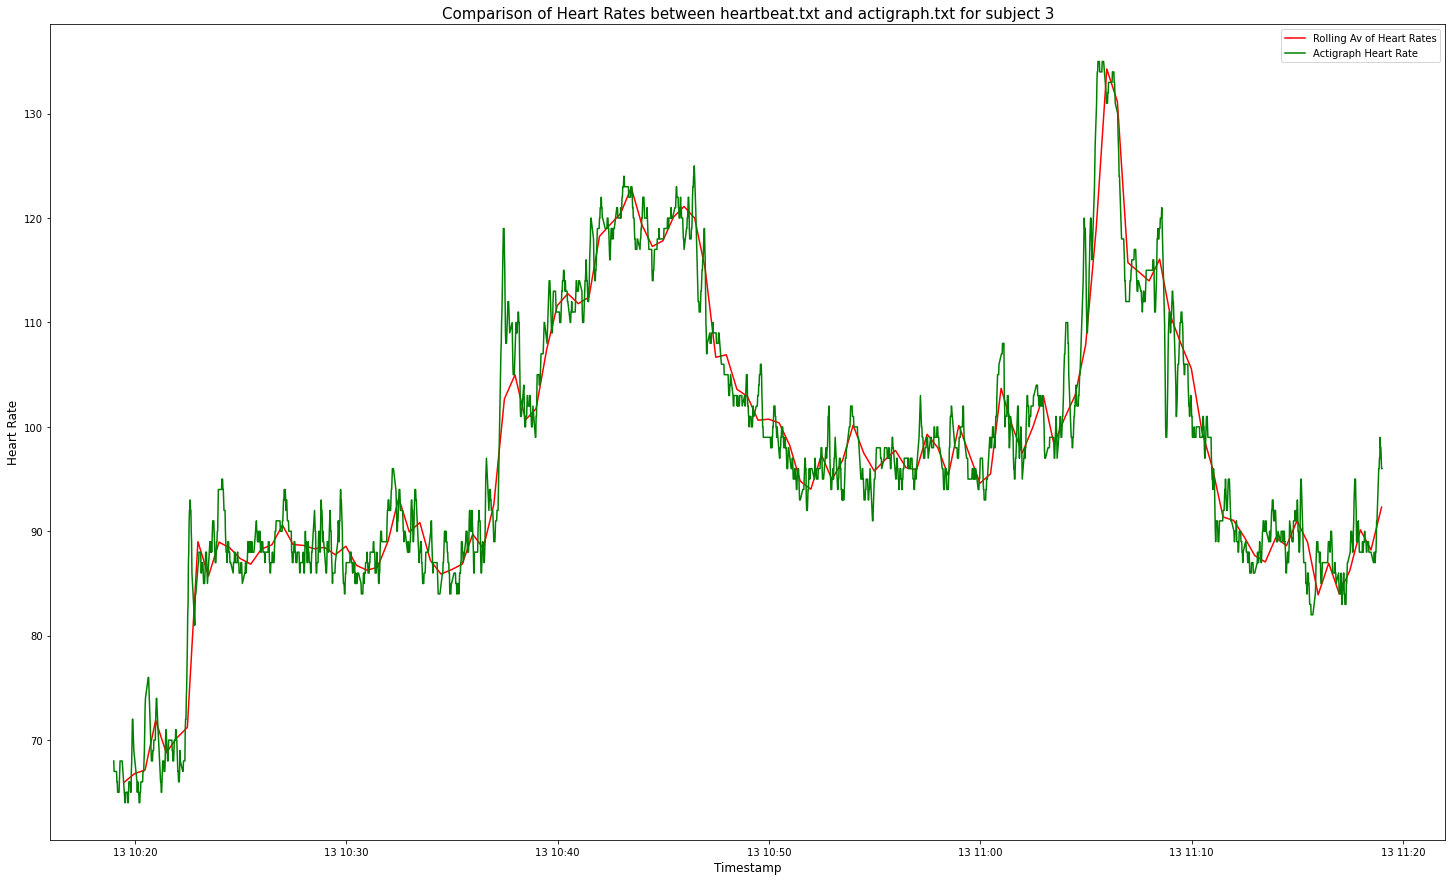

In [37]:
display_heart_rate(3)

---
## Task 8: relating to other data

The data in `actigraph.txt` also contains the following columns:

- `Steps` indicates the number of steps detected per second (using a pedometer).
- `Inclinometer Standing`/`Sitting`/`Lying` indicates the position of the subject, automatically detected by the device.
- `Inclinometer Off` indicates when the device didn't record a position.

In particular, the `Inclinometer ...` columns record either `0` or `1`, and they are mutually exclusive over each row. This means that, for example, a subject can't be recorded simultaneously sitting and standing.

---
🚩 ***Task 8:*** Using the results of your data processing work in previous tasks, can you relate some of this additional data (and/or some of the data in `subject_info.txt`) to the heart rate estimates that you have obtained?

You are free to choose how you complete this task. You will be assessed on the correctness of your code and analysis, the quality of your code (readability, commenting/documentation, structure), and the presentation of your results.

Note that you do not have to use **all** of the extra data to obtain full marks.

**[5 marks]**

---
💾 *If you are using `hr_rolling.npy` and the actigraph data in the `testing` folder, this is the information for this person:*

| Weight | Height | Age |
|:-:|:-:|:-:|
| 85 | 180 | 27 |